# Foundations for statistical inference - Sampling distributions
In this lab, we investigate the ways in which the statistics from a random sample of data can serve as point estimates for population parameters. We’re interested in formulating a sampling distribution of our estimate in order to learn about the properties of the estimate, such as its distribution.

# The data
We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor’s office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let’s load the data.

In [2]:
import pandas as pd
ames = pd.read_csv('ames.csv')

We see that there are quite a few variables in the data set, enough to do a very in-depth analysis. For this lab, we’ll restrict our attention to just two of the variables: the above ground living area of the house in square feet (`Gr.Liv.Area`) and the sale price (`SalePrice`). To save some effort throughout the lab, create two variables with short names that represent these two variables.

In [3]:
area = ames['Gr.Liv.Area']
price = ames['SalePrice']

Let’s look at the distribution of area in our population of home sales by calculating a few summary statistics and making a histogram.

In [4]:
area.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr.Liv.Area, dtype: float64

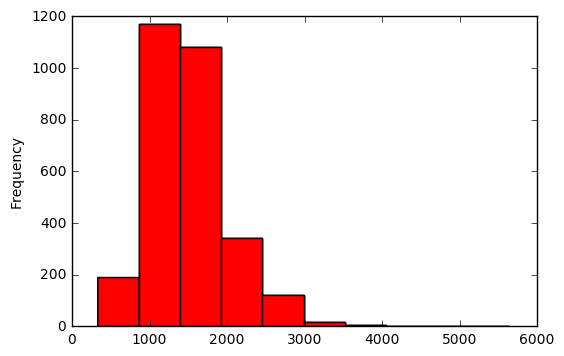

In [7]:
import matplotlib.pyplot as plt
area.plot.hist()
plt.show()

**Exercise 1** Describe this population distribution.

# The unknown sampling distribution
In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [8]:
samp1 = area.sample(50)

This command collects a simple random sample of size 50 from the Series `area`, which is assigned to `samp1`. This is like going into the City Assessor’s database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

**Exercise 2** Describe the distribution of this sample. How does it compare to the distribution of the population?

If we’re interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.

In [13]:
samp1.mean()

1427.56

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3% of the population.

**Exercise 3** Take a second sample, also of size 50, and call it `samp2`. How does the mean of `samp2` compare with the mean of  `samp1`? Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?

Not surprisingly, every time we take another random sample, we get a different sample mean. It’s useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the *sampling distribution*, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

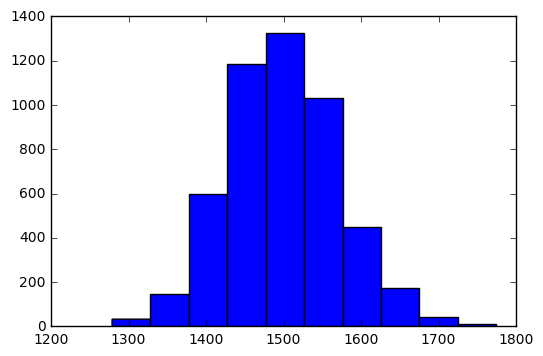

In [47]:
sample_means50 = [None] *  5000
for i in range(0,5000):
    samp = area.sample(50)
    sample_means50[i] = samp.mean()

plt.hist(sample_means50)
plt.show()

If you would like to adjust the bin width of your histogram to show a little more detail, you can do so by changing the `bins` argument.

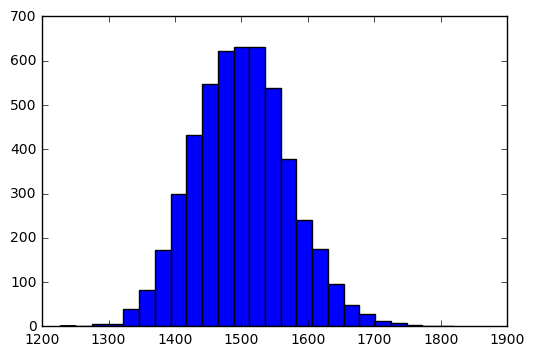

In [20]:
plt.hist(sample_means50, bins=25)
plt.show()

Here we use Python to take 5000 samples of size 50 from the population, calculate the mean of each sample, and store each result in an array called `sample_means50`. On the next page, we’ll review how this set of code works.

**Exercise 4** How many elements are there in `sample_means50`? Describe the sampling distribution, and be sure to specifically note its center. Would you expect the distribution to change if we instead collected 50,000 sample means?

# Interlude: The `for` loop
Let’s take a break from the statistics for a moment to let that last block of code sink in. You have just run your first `for` loop, a cornerstone of computer programming. The idea behind the for loop is iteration: it allows you to execute code as many times as you want without having to type out every iteration. In the case above, we wanted to iterate the two indented lines of code that take a random sample of size 50 from `area` then save the mean of that sample into the `sample_means50` array. Without the `for` loop, this would be painful:

In [ ]:
sample_means50 = [None] *  5000

samp = area.sample(50)
sample_means50[0] = samp.mean()

samp = area.sample(50)
sample_means50[1] = samp.mean()

samp = area.sample(50)
sample_means50[2] = samp.mean()

samp = area.sample(50)
sample_means50[3] = samp.mean()

and so on…

With the `for` loop, these thousands of lines of code are compressed into a handful of lines. We’ve added one extra line to the code below, which prints the variable `i` during each iteration of the for loop. Run this code.

In [21]:
sample_means50 = [None] *  5000
for i in range(0,5000):
    samp = area.sample(50)
    sample_means50[i] = samp.mean()
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Let’s consider this code line by line to figure out what it does. In the first line we initialized an array. In this case, we created an array of 5000 `None` values called `sample_means50`. This array will store values generated within the `for` loop.

The second line calls the for loop itself. The syntax can be loosely read as, “for every element i from 0 to 4999, run the following lines of code”. You can think of `i` as the counter that keeps track of which loop you’re on. Therefore, more precisely, the loop will run once when `i = 0`, then once when `i = 1`, and so on up to `i = 4999`.

The body of the `for` loop is the part that is indented, and this set of code is run for each value of `i`. Here, on every loop, we take a random sample of size 50 from `area`, take its mean, and store it as the ith element of `sample_means50`.

In order to display that this is really happening, we asked Python to print `i` at each iteration. This line of code is optional and is only used for displaying what’s going on while the `for` loop is running.

The for loop allows us to not just run the code 5000 times, but to neatly package the results, element by element, into the empty array that we initialized at the outset.

**Exercise 5** To make sure you understand what you’ve done in this loop, try running a smaller version. Initialize an array of 100 `None`s called `sample_means_small`. Run a loop that takes a sample of size 50 from `area` and stores the sample mean in `sample_means_small`, but only iterate from 1 to 100. Print the output to your screen (type  `sample_means_small` into the console and press enter). How many elements are there in this object called `sample_means_small`? What does each element represent?

# Sample size and the sampling distribution
Mechanics aside, let’s return to the reason we used a `for` loop: to compute a sampling distribution, specifically, this one.

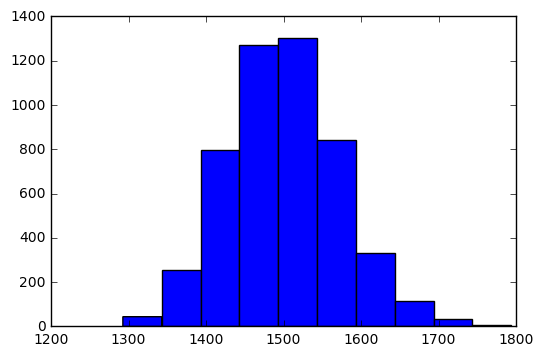

In [24]:
plt.hist(sample_means50)
plt.show()

The sampling distribution that we computed tells us much about estimating the average living area in homes in Ames. Because the sample mean is an unbiased estimator, the sampling distribution is centered at the true average living area of the the population, and the spread of the distribution indicates how much variability is induced by sampling only 50 home sales.

To get a sense of the effect that sample size has on our distribution, let’s build up two more sampling distributions: one based on a sample size of 10 and another based on a sample size of 100.

In [45]:
sample_means10 = [None] *  5000
sample_means100 = [None] *  5000
for i in range(0,5000):
    samp = area.sample(10)
    sample_means10[i] = samp.mean()
    samp = area.sample(100)
    sample_means100[i] = samp.mean()    

Here we’re able to use a single `for` loop to build two distributions by adding additional indented lines. Don’t worry about the fact that `samp` is used for the name of two different objects. In the second command of the `for` loop, the mean of `samp` is saved to the relevant place in the array `sample_means10`. With the mean saved, we’re now free to overwrite the object `samp` with a new sample, this time of size 100. In general, anytime you create an object using a name that is already in use, the old object will get replaced with the new one.

To see the effect that different sample sizes have on the sampling distribution, plot the three distributions on top of one another.

In [30]:
import numpy as np

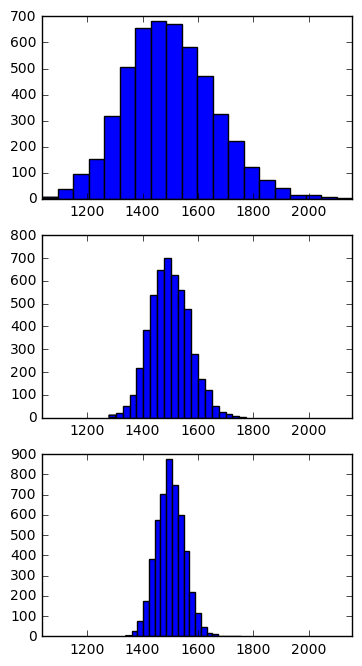

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 8))
left = np.min(sample_means10)
right = np.max(sample_means10)
axes[0].hist(sample_means10, bins=20)
axes[0].set_xlim(left, right)
axes[1].hist(sample_means50, bins=20)
axes[1].set_xlim(left, right)
axes[2].hist(sample_means100, bins=20)
axes[2].set_xlim(left, right)
plt.show()

The first command specifies that you’d like to divide the plotting area into 3 rows and 1 column of plots (axes). The `bins` argument specifies the number of bins used in constructing the histogram. The `set_xlim` function specifies the range of the x-axis of the histogram, and by setting it equal for each histogram, we ensure that all three histograms will be plotted with the same limits on the x-axis.

**Exercise 6** When the sample size is larger, what happens to the center? What about the spread?

# On your own
So far, we have only focused on estimating the mean living area in homes in Ames. Now you’ll try to estimate the mean home price.

1. Take a random sample of size 50 from `price`. Using this sample, what is your best point estimate of the population mean?

2. Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 5000 samples from the population of size 50 and computing 5000 sample means. Store these means in an array called `sample_means50`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.

3. Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new array called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?

4. Of the sampling distributions from 2 and 3, which has a smaller spread? If we’re concerned with making estimates that are more often close to the true value, would we prefer a distribution with a large or small spread?

*This notebook is based on the OpenIntro R lab [Intro to Inference](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/sampling_distributions/sampling_distributions.html).*